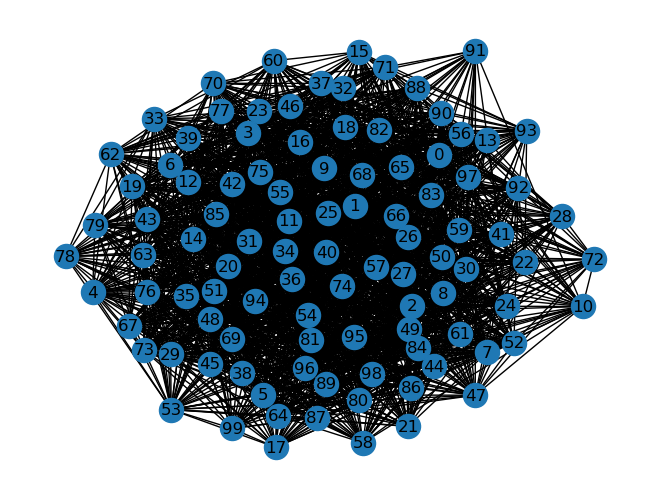

In [130]:
import pulp
import networkx as nx
#G_i = nx.Graph()
num_nodes = 100
G_i = nx.erdos_renyi_graph(num_nodes, p)


nx.draw(G_i,with_labels=True)


In [131]:
import cvxpy as cp
import networkx as nx
import numpy as np

# Create a random graph for demonstration purposes
np.random.seed(0)

# Define the optimization variables
n = len(G_i.nodes)
X = cp.Variable((n, n), boolean=True)

# Define the MaxCut objective function
objective = cp.Maximize(0.5 * cp.sum(cp.multiply(nx.adjacency_matrix(G_i).toarray(), (1 - X))))

# Define the MaxCut constraints
constraints = []

# Each node should belong to either set 0 or set 1
for i in range(n):
    constraints.append(cp.sum(X[i, :]) == 1)

# Formulate the MaxCut problem
problem = cp.Problem(objective, constraints)

# Solve the MaxCut problem
problem.solve()

# Extract the optimal solution
cut_value = problem.value
cut = X.value

# Print the results
print("MaxCut Value:", cut_value)
print("Partition of Nodes:")
for i in range(n):
    if cut[i, 0] == 1:
        print(f"Node {i}: Set 0")
    else:
        print(f"Node {i}: Set 1")


MaxCut Value: 1965.0
Partition of Nodes:
Node 0: Set 0
Node 1: Set 0
Node 2: Set 0
Node 3: Set 1
Node 4: Set 0
Node 5: Set 1
Node 6: Set 1
Node 7: Set 1
Node 8: Set 0
Node 9: Set 1
Node 10: Set 1
Node 11: Set 1
Node 12: Set 0
Node 13: Set 0
Node 14: Set 0
Node 15: Set 1
Node 16: Set 0
Node 17: Set 1
Node 18: Set 1
Node 19: Set 0
Node 20: Set 0
Node 21: Set 0
Node 22: Set 1
Node 23: Set 0
Node 24: Set 0
Node 25: Set 0
Node 26: Set 1
Node 27: Set 0
Node 28: Set 0
Node 29: Set 0
Node 30: Set 1
Node 31: Set 0
Node 32: Set 0
Node 33: Set 0
Node 34: Set 0
Node 35: Set 1
Node 36: Set 1
Node 37: Set 1
Node 38: Set 0
Node 39: Set 0
Node 40: Set 0
Node 41: Set 1
Node 42: Set 1
Node 43: Set 0
Node 44: Set 1
Node 45: Set 0
Node 46: Set 0
Node 47: Set 0
Node 48: Set 1
Node 49: Set 1
Node 50: Set 0
Node 51: Set 1
Node 52: Set 0
Node 53: Set 0
Node 54: Set 1
Node 55: Set 0
Node 56: Set 1
Node 57: Set 0
Node 58: Set 1
Node 59: Set 0
Node 60: Set 0
Node 61: Set 1
Node 62: Set 0
Node 63: Set 1
Node 64: 

In [132]:

import random

def maxcut_greedy(graph):
    set0 = set()
    set1 = set()
    
    # Randomly select a starting vertex and add it to set0
    start_vertex = random.choice(list(graph.nodes()))
    set0.add(start_vertex)
    
    # Iterate over the remaining vertices and add them to set0 or set1
    for vertex in graph.nodes():
        if vertex not in set0:
            if any(graph.has_edge(vertex, v) for v in set0):
                set1.add(vertex)
            else:
                set0.add(vertex)
    
    return set0, set1

# Find the MaxCut using the greedy heuristic
set0, set1 = maxcut_greedy(G_i)

# Calculate the MaxCut value
cut_value = sum(1 for u, v in G.edges() if (u in set0 and v in set1) or (u in set1 and v in set0))

# Print the results
print("Set 0:", set0)
print("Set 1:", set1)
print("MaxCut Value:", cut_value)

Set 0: {32, 1, 4, 5, 9, 15, 51}
Set 1: {0, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
MaxCut Value: 30


In [133]:
def maxcut_gw(graph, num_rounds=100):
    best_cut_value = -1
    best_partition = None

    for _ in range(num_rounds):
        # Generate a random vector of signs (+1 or -1) for each vertex
        signs = [random.choice([1, -1]) for _ in range(len(graph.nodes()))]

        # Compute the cut value based on the signs of the vertices
        cut_value = 0
        for u, v in graph.edges():
            if signs[u] != signs[v]:
                cut_value += 1

        # Update the best cut value and partition if needed
        if cut_value > best_cut_value:
            best_cut_value = cut_value
            best_partition = signs

    # Create two sets based on the signs of the vertices
    set0 = {i for i, sign in enumerate(best_partition) if sign == 1}
    set1 = {i for i, sign in enumerate(best_partition) if sign == -1}

    return set0, set1, best_cut_value

# Find the MaxCut using the GW method
set0, set1, cut_value = maxcut_gw(G_i)

# Print the results
print("Set 0:", set0)
print("Set 1:", set1)
print("MaxCut Value:", cut_value)

Set 0: {0, 2, 3, 4, 6, 7, 8, 9, 11, 14, 15, 17, 18, 20, 21, 22, 23, 24, 25, 26, 32, 34, 39, 41, 44, 45, 50, 51, 53, 55, 56, 58, 59, 60, 62, 64, 66, 67, 69, 70, 71, 76, 80, 81, 84, 90, 93, 94, 95, 96, 97, 99}
Set 1: {1, 5, 10, 12, 13, 16, 19, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 40, 42, 43, 46, 47, 48, 49, 52, 54, 57, 61, 63, 65, 68, 72, 73, 74, 75, 77, 78, 79, 82, 83, 85, 86, 87, 88, 89, 91, 92, 98}
MaxCut Value: 1035


KNN


In [137]:
import networkx as nx
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Function to extract features from a graph and partition
def extract_features(graph, partition):
    # Here, you can compute various features from the graph and partition
    # For simplicity, let's use the number of edges between the two partitions
    cut_edges = sum(1 for u, v in graph.edges() if partition[u] != partition[v])
    return [cut_edges]

# Function to calculate the MaxCut value for a given partition
def calculate_cut_value(graph, partition):
    cut_edges = sum(1 for u, v in graph.edges() if partition[u] != partition[v])
    return cut_edges / 2  # Divide by 2 since each edge is counted twice

# Generate data for training the KNN model
num_samples = 5000  # Number of MaxCut instances
data = []  # List to store data samples
knn_features = []  # List to store feature vectors
knn_labels = []  # List to store corresponding MaxCut solutions

for _ in range(num_samples):
    # Create a random graph
    num_nodes = 100
    p = 0.4
    G = nx.erdos_renyi_graph(num_nodes, p)

    # Randomly initialize a partition
    partition = {node: np.random.choice([0, 1]) for node in G.nodes()}

    # Use the MaxCut heuristic to obtain a MaxCut solution (cut value)
    cut_value = calculate_cut_value(G, partition)

    # Extract features from the graph and partition
    features = extract_features(G, partition)

    # Store the data sample
    data.append((features, cut_value))

    # Append the feature vector and label to the KNN dataset
    knn_features.append(features)
    knn_labels.append(cut_value)

# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(knn_features, knn_labels)

# Now, you can use this KNN model to guide the MaxCut heuristic, as shown in the previous response.

KNeighborsRegressor(n_neighbors=10)

In [138]:
# Continue vertex selection until there are unassigned vertices
while None in partition.values():
    # Extract features for the current state of the graph and partition
    features = extract_features(G_i, partition)

    # Initialize a list to store predicted cut values for each vertex
    predicted_cut_values = []

    # Iterate over unassigned vertices and predict cut values
    for vertex in G_i.nodes():
        if partition[vertex] is None:
            # Predict the cut value if the current vertex is assigned to one of the partitions
            partition[vertex] = 0
            predicted_cut_value = knn_model.predict([features])[0]
            partition[vertex] = None  # Reset the partition assignment
            predicted_cut_values.append(predicted_cut_value)

    # Select the vertex that maximizes the predicted cut value
    best_vertex = np.argmax(predicted_cut_values)
    partition[best_vertex] = 0  # Assign the vertex to partition 0
    selected_vertices.append(best_vertex)

# Calculate and print the final cut value
final_cut_value = calculate_cut_value(G_i, partition)
print("Final Cut Value:", final_cut_value)

Final Cut Value: 494.5


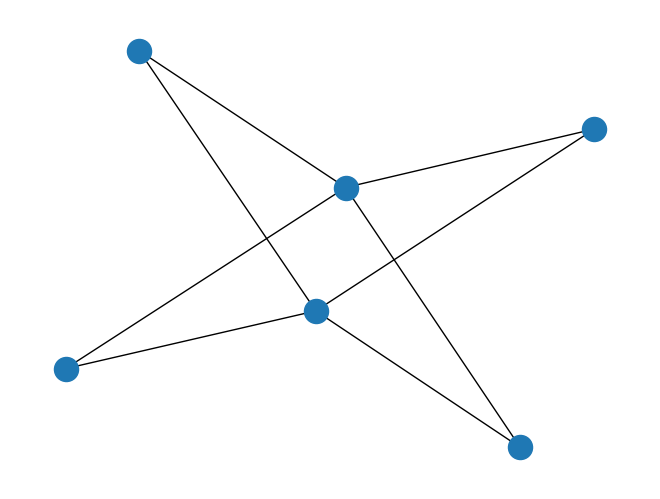